# Chapter 2

In [1]:
import math

import scripts.draw2d as d2
from scripts.vectors import *

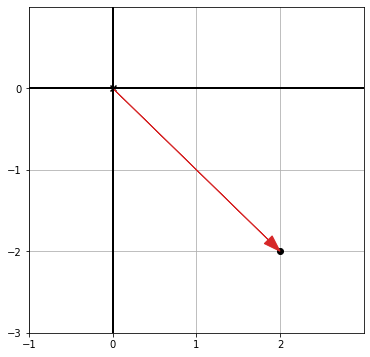

In [2]:
d2.draw2d(d2.Points2D((2, -2)), d2.Arrow2D((2,-2)))

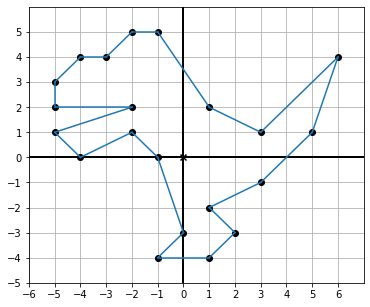

In [3]:
dino_vectors = [
    (6, 4),
    (3, 1),
    (1, 2),
    (-1, 5),
    (-2, 5),
    (-3, 4),
    (-4, 4),
    (-5, 3),
    (-5, 2),
    (-2 ,2),
    (-5, 1),
    (-4, 0),
    (-2, 1),
    (-1, 0),
    (0, -3),
    (-1, -4),
    (1, -4),
    (2, -3),
    (1, -2),
    (3, -1),
    (5, 1),
]

d2.draw2d(d2.Points2D(*dino_vectors), d2.Polygon2D(*dino_vectors))

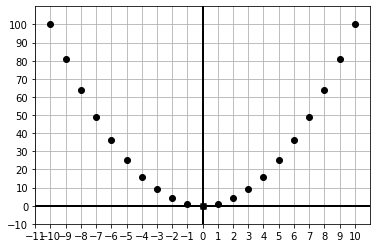

In [4]:
xs = range(-10, 11)
ys = [x**2 for x in xs]
points = zip(xs, ys)

d2.draw2d(d2.Points2D(*points), grid=(1, 10), nice_aspect_ratio=False)

In [5]:
def create_copies(original, number, displacement):
    result = [original]
    for i in range(1, number):
        result.append(translate(displacement, result[-1]))
    return result

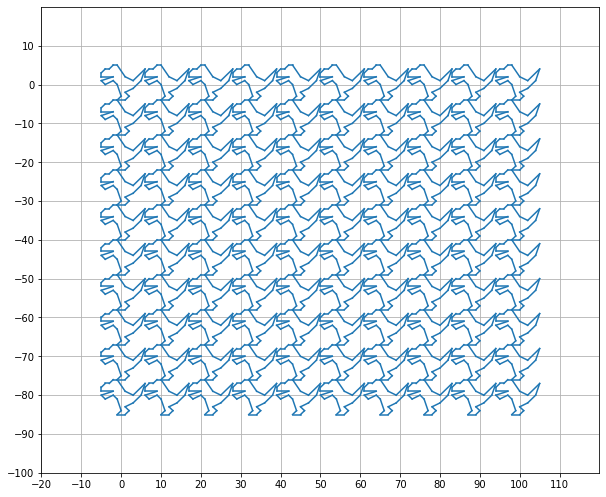

In [6]:
size = 10
horizontal_offset = 11
vertical_offset = 9

dinos = create_copies(dino_vectors, size, (horizontal_offset, 0))
for i in range(1, size):
    dinos.extend([translate((0, -vertical_offset), dino) for dino in dinos[-size:]])
    
d2.draw2d(*[d2.Polygon2D(*dino_points) for dino_points in dinos], grid=(10, 10), width=10, axes=False, origin=False)

In [7]:
print(max(dino_vectors, key=length))

(6, 4)


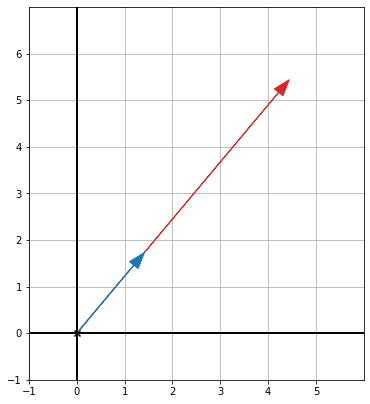

In [8]:
v = (math.sqrt(2), math.sqrt(3))
d2.draw2d(d2.Arrow2D(scale(math.pi, v), color=d2.red), d2.Arrow2D(v, color=d2.blue))

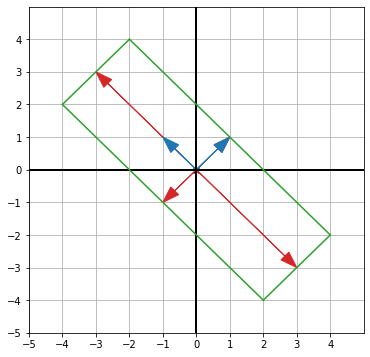

In [9]:
u = (-1, 1)
v = (1, 1)

r = 3
s = 1

d2.draw2d(
    d2.Arrow2D(scale(r, u), color=d2.red),
    d2.Arrow2D(scale(s, v), color=d2.red),
    d2.Arrow2D(scale(-r, u), color=d2.red),
    d2.Arrow2D(scale(-s, v), color=d2.red),
    d2.Polygon2D(
        add(scale(r, u), scale(s, v)),
        add(scale(-r, u), scale(s, v)),
        add(scale(-r, u), scale(-s, v)),
        add(scale(r, u), scale(-s, v)),
        color=d2.green
    ),
    d2.Arrow2D(u, color=d2.blue),
    d2.Arrow2D(v, color=d2.blue)
)

In [10]:
u = (-2, 0)
v = (1.5, 1.5)
w = (4, 1)

print(subtract(v, w))
print(subtract(u, v))
print(subtract(w, v))

(-2.5, 0.5)
(-3.5, -1.5)
(2.5, -0.5)


In [11]:
def perimeter(*vectors):
    distances = [distance(vectors[i], vectors[(i+1)%len(vectors)])for i in range(0,len(vectors))]
    return sum(distances)

print(perimeter(*dino_vectors))

44.77115093694563


In [12]:
u = (1, -1)

for i in range(13, 1, -1):
    for j in range(i):
        v = (i, j)
        if distance(u, v) == 13:
            print(v)
            print("Dispalcement", subtract(v, u))


(13, 4)
Dispalcement (12, 5)


In [13]:
polar = (5, 37 * math.pi/180)
print(to_cartesian(polar))

(3.993177550236464, 3.0090751157602416)


In [14]:
cartesian = (4, 3)
polar = to_polar(cartesian)
polar = (polar[0], polar[1] * 180/math.pi)
print(polar)

(5.0, 36.86989764584402)


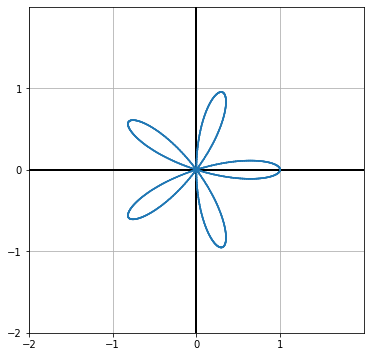

In [15]:
polar_coords = [(math.cos(5*x*math.pi/500.0), 2*math.pi*x/1000.0) for x in range(0,1000)]

d2.draw2d(d2.Polygon2D(*[to_cartesian(c) for c in polar_coords]))

In [16]:
def points_angle(v1, v2, v3):
    a1, a2 = direction2d(subtract(v1, v2)), direction2d(subtract(v3, v2))
    return abs(normalize_radians(a1) - normalize_radians(a2))

print("mouth", deg(points_angle(dino_vectors[8], dino_vectors[9], dino_vectors[10])))
print("foot", deg(points_angle(dino_vectors[14], dino_vectors[15], dino_vectors[16])))
print("tail", deg(points_angle(dino_vectors[20], dino_vectors[0], dino_vectors[1])))

mouth 18.434948822922006
foot 45.0
tail 26.56505117707799


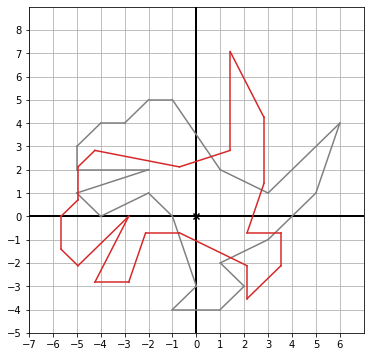

In [17]:
d2.draw2d(
    d2.Polygon2D(*dino_vectors, color=d2.gray),
    d2.Polygon2D(*rotate2d(math.pi/4, dino_vectors), color=d2.red),
)

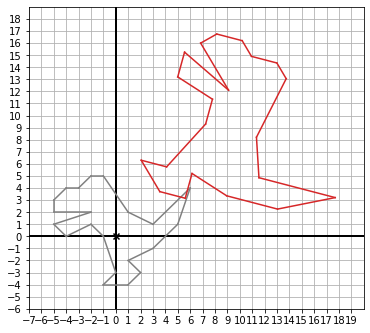

In [18]:
d2.draw2d(
    d2.Polygon2D(*dino_vectors, color=d2.gray),
    d2.Polygon2D(*translate((8, 8), rotate2d(5*math.pi/3, scale_all(1.5, dino_vectors))), color=d2.red),
)

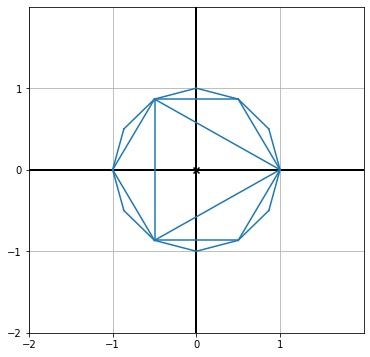

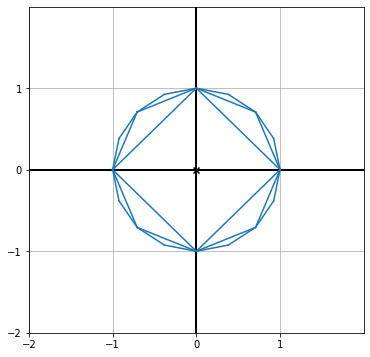

In [19]:
def regular_polygon(n, radius=1):
    if n < 3:
        return []
    return [to_cartesian((radius, i * 2*math.pi/n)) for i in range(n)]

d2.draw2d(
    d2.Polygon2D(*regular_polygon(3)),
    d2.Polygon2D(*regular_polygon(6)),
    d2.Polygon2D(*regular_polygon(12))
)

d2.draw2d(
    d2.Polygon2D(*regular_polygon(4)),
    d2.Polygon2D(*regular_polygon(8)),
    d2.Polygon2D(*regular_polygon(16))
)

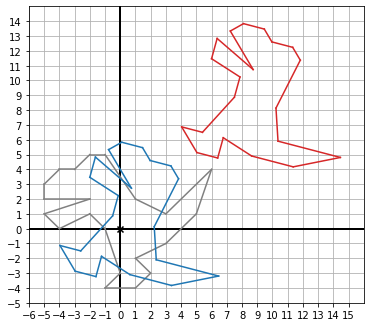

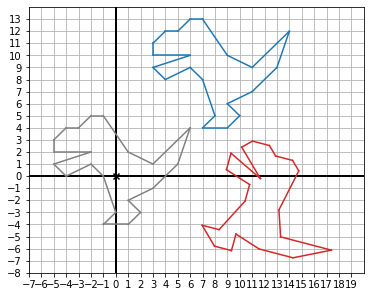

In [20]:
d2.draw2d(
    d2.Polygon2D(*dino_vectors, color=d2.gray),
    d2.Polygon2D(*rotate2d(5*math.pi/3, dino_vectors), color=d2.blue),
    d2.Polygon2D(*translate((8, 8), rotate2d(5*math.pi/3, dino_vectors)), color=d2.red),
)

d2.draw2d(
    d2.Polygon2D(*dino_vectors, color=d2.gray),
    d2.Polygon2D(*translate((8, 8), dino_vectors), color=d2.blue),
    d2.Polygon2D(*rotate2d(5*math.pi/3, translate((8, 8), dino_vectors)), color=d2.red),
)